In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data = data.dropna()
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
X = data.drop(['type', 'quality'], axis = 1)
y = data['quality']

In [7]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [9]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [10]:
selectk = SelectKBest(score_func = f_classif, k = 5)
selectk.fit_transform(X_train, y_train)
selected_features_mask = selectk.get_support()
selected_features = X_train.columns[selected_features_mask]

print("Selected Features:", selected_features.tolist())

Selected Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']


In [11]:
vt = VarianceThreshold(threshold = 0.5)
vt.fit_transform(X_train)
selected_features_mask = vt.get_support()
selected_features = X_train.columns[selected_features_mask]

variances = X_train.var()


selected_features = X_train.columns[selected_features_mask]
selected_variances = variances[selected_features_mask]

variances_df = pd.DataFrame({'Feature': selected_features, 'Variance': selected_variances})

print(variances_df.sort_values(by = 'Variance', ascending = False))


                                   Feature  Variance
residual sugar              residual sugar  1.029921
pH                                      pH  1.009435
free sulfur dioxide    free sulfur dioxide  1.008181
sulphates                        sulphates  1.003392
chlorides                        chlorides  1.003194
total sulfur dioxide  total sulfur dioxide  0.998909
density                            density  0.998455
fixed acidity                fixed acidity  0.996765
citric acid                    citric acid  0.991001
alcohol                            alcohol  0.981285
volatile acidity          volatile acidity  0.974646


In [13]:
number_of_estimators = range(25, 125, 25)
number_of_features = []
feature_importances = {}

for n in number_of_estimators:
  rfc = RandomForestClassifier(n_estimators = n, random_state = 42)
  rfc.fit(X_train, y_train)
  number_of_features.append(X_train.shape[1] - np.sum(rfc.feature_importances_ == 0))

  feature_importances[n] = rfc.feature_importances_

  feature_importances_df = pd.DataFrame(feature_importances, index = X_train.columns)
print(feature_importances_df)

for n in number_of_estimators:
    print(f"Top features for n_estimators = {n}:")
    print(feature_importances_df[n].sort_values(ascending=False))



                           25        50        75        100
fixed acidity         0.075929  0.074741  0.074850  0.074693
volatile acidity      0.101576  0.101728  0.103045  0.103157
citric acid           0.082607  0.080809  0.080650  0.080732
residual sugar        0.085376  0.086766  0.085603  0.086242
chlorides             0.086620  0.088357  0.088430  0.088159
free sulfur dioxide   0.085945  0.085445  0.085588  0.086145
total sulfur dioxide  0.087270  0.087841  0.087703  0.087299
density               0.106996  0.101980  0.101524  0.102469
pH                    0.084311  0.083523  0.083423  0.083476
sulphates             0.087835  0.089018  0.087754  0.086756
alcohol               0.115534  0.119793  0.121430  0.120872
Top features for n_estimators = 25:
alcohol                 0.115534
density                 0.106996
volatile acidity        0.101576
sulphates               0.087835
total sulfur dioxide    0.087270
chlorides               0.086620
free sulfur dioxide     0.085945
r

In [17]:
base_estimator = RandomForestClassifier(n_estimators = 50, random_state = 42)
rfe = RFE(base_estimator, n_features_to_select = 10)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_

selected_features_mask = rfe.support_

selected_features = [X_train.columns[i] for i in range(len(X_train.columns)) if selected_features_mask[i]]

# Create a DataFrame to display features, their rankings, and whether they were selected
features_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': ranking,
    'Selected': selected_features_mask
})

print(features_ranking_df.sort_values(by='Ranking'))


                 Feature  Ranking  Selected
1       volatile acidity        1      True
2            citric acid        1      True
3         residual sugar        1      True
4              chlorides        1      True
6   total sulfur dioxide        1      True
5    free sulfur dioxide        1      True
7                density        1      True
8                     pH        1      True
10               alcohol        1      True
9              sulphates        1      True
0          fixed acidity        2     False


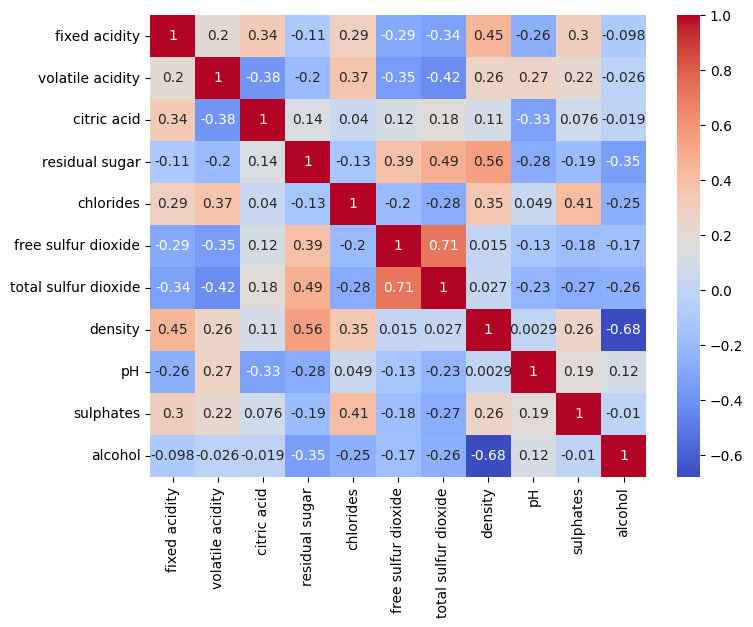

In [18]:
correlation_matrix = X_train.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [19]:
correlation_quality = X_train.corrwith(y_train)
print(correlation_quality.sort_values(ascending = False))

alcohol                 0.031344
sulphates               0.013647
pH                      0.008516
citric acid             0.005407
fixed acidity           0.003805
volatile acidity       -0.020653
free sulfur dioxide    -0.024253
total sulfur dioxide   -0.024307
residual sugar         -0.024863
chlorides              -0.029820
density                -0.036495
dtype: float64


In [22]:
from sklearn.feature_selection import RFECV


base_estimator = RandomForestClassifier(random_state=42)

rfe = RFECV(estimator=base_estimator, step=1, cv=5, scoring='accuracy')
rfe.fit(X_train, y_train)

selected_features = np.array(X_train.columns)[rfe.support_]
feature_ranking = rfe.ranking_

feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking,
    'Selected': rfe.support_
})

# Sort the DataFrame by ranking
feature_ranking_df.sort_values(by='Ranking', inplace=True)

# Print the DataFrame
print("Feature Ranking (1 = most important):")
print(feature_ranking_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Feature Ranking (1 = most important):
                 Feature  Ranking  Selected
1       volatile acidity        1      True
3         residual sugar        1      True
5    free sulfur dioxide        1      True
4              chlorides        1      True
6   total sulfur dioxide        1      True
7                density        1      True
10               alcohol        1      True
9              sulphates        1      True
8                     pH        2     False
2            citric acid        3     False
0          fixed acidity        4     False


From the different feature selection tehcniques that have been used, **'pH', 'citric acid'** and  **'fixed acidity'** have not made to the top most important features that affect the quality of wine. The features will therefore be eliminated from our predictor variables list. We however are also very aware of the multicollinearity that exists between **'Total sulfur dioxide' and 'free sulfur dioxide', 'alcohol' and 'density'** and **'residual sugar' and 'density'**. As we move forward experimenting on the best model algorithms, we will take this into consideration.